In [11]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tueplots.constants.color import rgb
from tueplots import bundles
import os
import imageio
from IPython.display import Image

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 300, 'font.family': 'Times New Roman'})

In [4]:
df = pd.read_csv("./../dat/Publications.csv")
df = df.drop_duplicates(subset=['Professor', 'Title'], keep='first')
professors = df["Professor"].unique()

In [5]:
professors_collab_count = {prof: {} for prof in professors}

for _, row in df.iterrows():
    prof = row.iloc[0]
    for coauthor in row.iloc[4].split(';'):
        if (coauthor != prof):
            if coauthor in professors_collab_count[prof]:
                professors_collab_count[prof][coauthor] +=1
            else:
                professors_collab_count[prof][coauthor] = 1                 

for prof in professors_collab_count:
    professors_collab_count[prof] = dict(sorted(professors_collab_count[prof].items(), key=lambda item: item[1], reverse=True))

# Create a plot for every professor that shows how often they collaborated with their top collaborators
top_collaborator_amount = 20

for professor in tqdm(professors, desc="Creating Plot for each Professor"):
    collab_counts = list(professors_collab_count[professor].values())
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig.get_size_inches()[0], 4)
    ax.bar(np.arange(top_collaborator_amount)+1, collab_counts[:top_collaborator_amount], color=rgb.tue_blue, alpha=1)   
    ax.grid(axis="y", which="major", color=rgb.tue_dark, linewidth=0.5)
  
    collaborators = list(professors_collab_count[professor].keys())
    collaborators = collaborators[:top_collaborator_amount]

    ax.set_xticks(np.arange(top_collaborator_amount)+1)
    ax.set_xticklabels(collaborators)
    ax.tick_params(axis='x', rotation=90)
    
    ax.set_xlabel('')
    ax.set_ylabel('Amount of collaborations')
    ax.set_title(f'Top collaborators for Prof. {professor}')
    
    plt.close()
    
    
    fig.savefig(f'./../plt/TopCollaboratorsPerProfessor/{professor}.png')

Creating Plot for each Professor: 100%|████████████████████████████████████████████████| 27/27 [00:06<00:00,  3.92it/s]


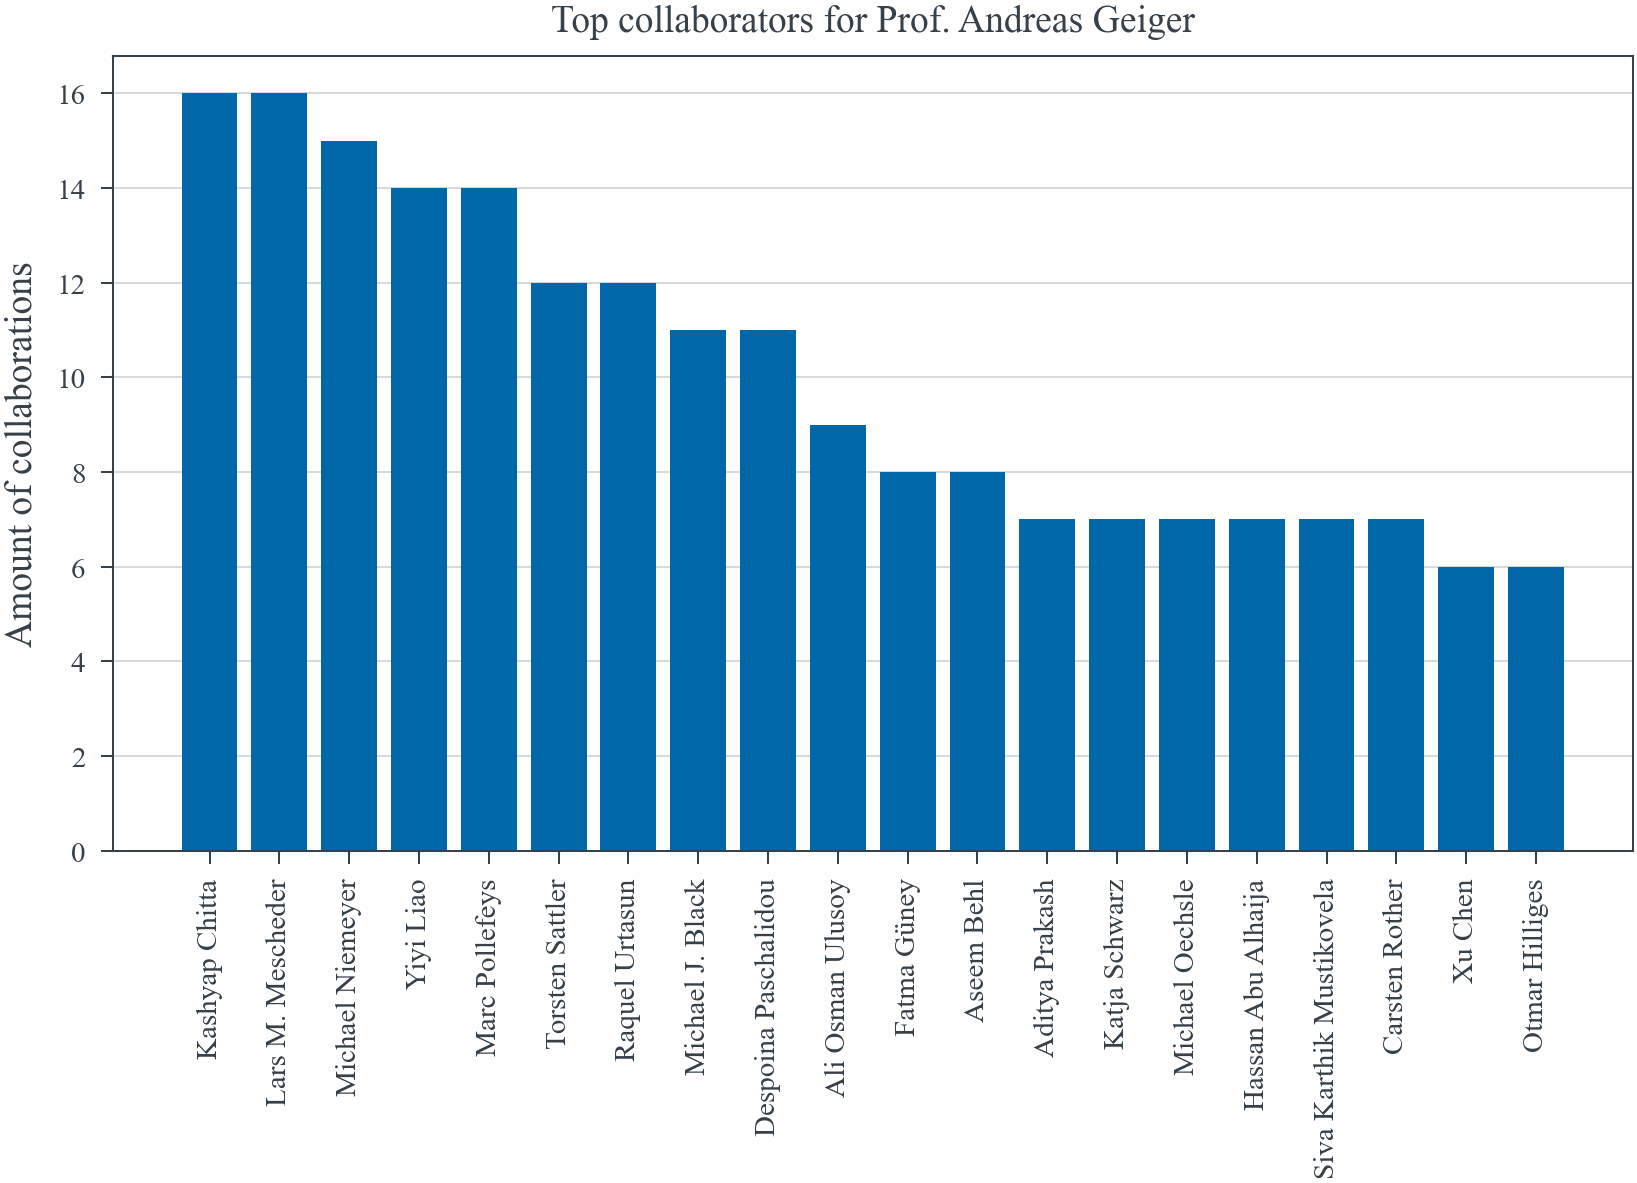

In [15]:
# Create a gif combining plots of all years
png_dir = './../plt/TopCollaboratorsPerProfessor/'
png_files = [f for f in os.listdir(png_dir) if f.endswith('.png')]

frames = []
for png_file in png_files:
    frames.append(imageio.v2.imread(os.path.join(png_dir, png_file)))

imageio.mimsave('./../plt/TopCollaboratorsPerProfessor/TopCollaboratorsPerProfessor.gif', frames, fps=0.3, loop=0)

Image(filename='./../plt/TopCollaboratorsPerProfessor/TopCollaboratorsPerProfessor.gif')